# **Netflix Data Cleaning, Analysis, and Visualization Project**

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from collections import Counter
import warnings

In [ ]:
# Suppressing warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [ ]:
path = '/content/drive/MyDrive/Dataset/netflix1.csv'

## Read the Netflix dataset

In [ ]:
df = pd.read_csv(path)

## Display the first few rows of the dataset

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# **Exploring the Data**

## Get basic information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


## Check column names

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

## Check for missing values

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


## Check for duplicate rows

In [ ]:
df.duplicated().sum()

0

# **Cleaning the Data**

## Rename columns for better readability

In [ ]:
df.rename(columns={'date_added':'Date', 'listed_in':'category'}, inplace=True)

## Convert 'Date' column to datetime format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

## Display the updated data

In [ ]:
df.head()

,show_id,type,title,director,country,Date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Summary statistics

In [ ]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


# **Data Analysis and Visualization**

## **Distribution of Movies and TV Shows on Netflix:**

## Count the occurrences of each type (Movie or TV Show)

In [ ]:
type_counts = df['type'].value_counts()

## Plot a pie chart to visualize the distribution of Movies and TV Shows

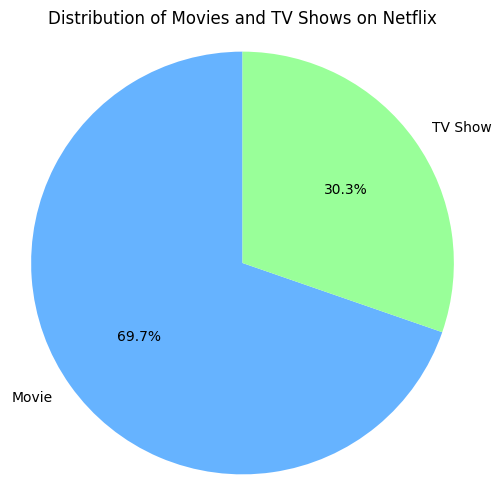

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.axis('equal')
plt.show()

## **Netflix Content Release Trend Over the Years**

## Count content by release year

In [ ]:
released_year = df.release_year.value_counts()

## Plot the content release trend using an area plot

In [ ]:
fig = px.area(released_year, x=released_year.index, y=released_year, title='Content Release Trend Over the Years')
iplot(fig)

## **Popularity of Content Ratings**

## Count the occurrences of each rating

In [ ]:
rating = df["rating"].value_counts()

## Visualize the popularity of ratings using a bar chart

In [ ]:
fig = px.bar(data_frame=rating,
             x=rating,
             y=rating.index,
             color=rating.index,
             text=rating,
             orientation="h",
             title="Popularity of Content Ratings",
             labels={"x": "Frequency", "rating": "Rating"},
             height=680)


## Customize trace appearance

In [ ]:
fig.update_traces(textposition="outside", outsidetextfont={"family": "DejaVu Sans", "size": 13})
iplot(fig)

## **Top 10 Movie Ratings**

## Group and count ratings by content type

In [ ]:
ratings = df.groupby(['rating', 'type'])['type'].value_counts().reset_index(name='count')

## Get top 10 movie ratings

In [ ]:
top_10_movie_ratings = ratings[ratings['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]

## Plot the top 10 movie ratings using a bar chart

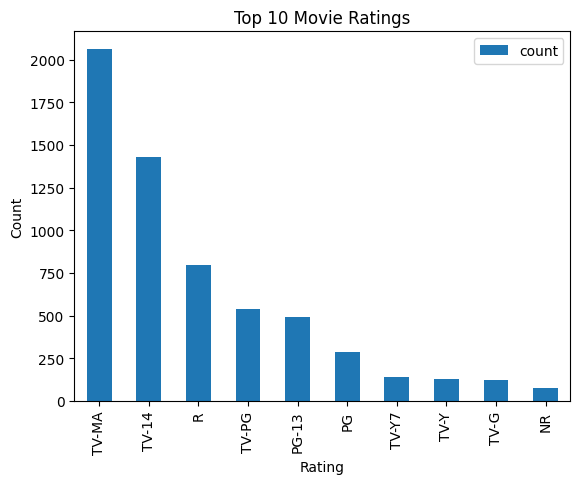

In [ ]:
top_10_movie_ratings.plot(x='rating', y='count', kind='bar', title='Top 10 Movie Ratings', xlabel='Rating', ylabel='Count', rot=90)
plt.show()

## **Top 10 TV Show Ratings**

## Get top 10 TV Show ratings

In [ ]:
top_10_TV_Show_ratings = ratings[ratings['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]

## Plot the top 10 TV show ratings using a bar chart

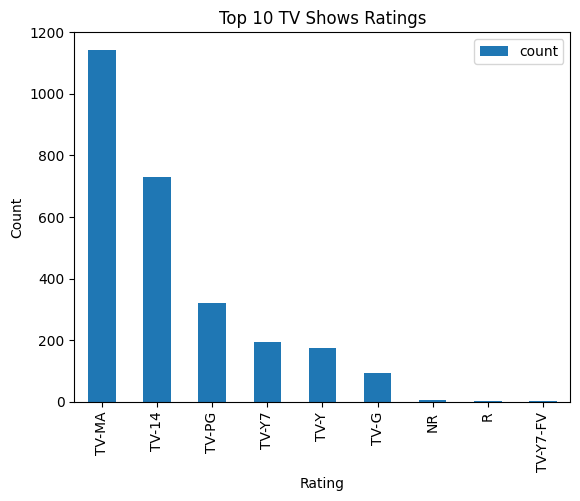

In [ ]:
top_10_TV_Show_ratings.plot(x='rating', y='count', kind='bar', title='Top 10 TV Shows Ratings', xlabel='Rating', ylabel='Count', rot=90)
plt.show()

## **Top 5 Directors on Netflix**

## Get the top 5 directors

In [ ]:
directors = df["director"].value_counts()[1:6]

## Plot the top 5 directors using a horizontal bar chart

In [ ]:
fig = px.bar(directors, y=directors.index, x=directors, color=directors.index, text_auto=True,
             labels={"director": "Director", "x": "Number of Movies & TV Shows"},
             orientation="h", title="Top 5 Directors")

## Customize the appearance of the plot

In [ ]:
fig.update_traces(textposition="outside", outsidetextfont={"family": "DejaVu Sans", "size": 15})
fig.update_layout(showlegend=False, height=550, width=800)
iplot(fig)

## **Movies & TV Shows Added Over the Years**

## Count the number of shows added per year

In [ ]:
shows_added_via_year = df.groupby(df["Date"].dt.year)["type"].count()

## Plot a line chart showing content added by year

In [ ]:
fig = px.line(shows_added_via_year, x=shows_added_via_year.index, y=shows_added_via_year, markers=True,
              title='Movies & TV Shows Added Over the Years', width=800, height=550,
              labels={"y": "Number of Movies & TV Shows", "date_added": "Year"})

## Customize the appearance of the line chart

In [ ]:
fig.update_xaxes(tickvals=shows_added_via_year.index)
fig.update_traces(line=dict(color='darkred'))
fig.update_layout(margin=dict(l=40, r=10, t=80, b=20))
iplot(fig)

## **Top 10 Countries Producing Content for Netflix**

## Get the top 10 countries

In [ ]:
country = df['country'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)

## Plot a bar chart showing the top 10 countries producing content

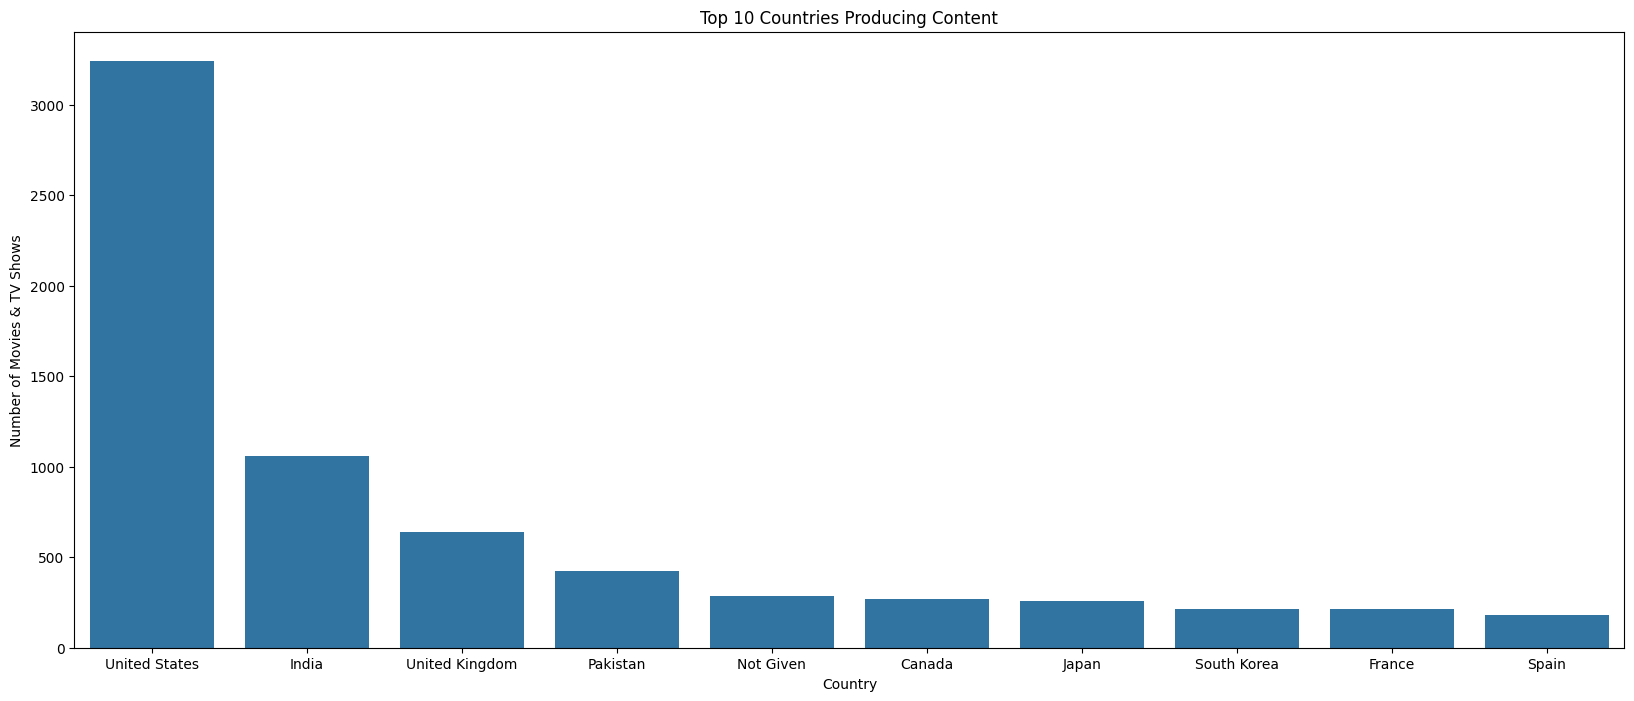

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Top 10 Countries Producing Content')
sns.barplot(x='country', y='count', data=country)
plt.xlabel('Country')
plt.ylabel('Number of Movies & TV Shows')
plt.show()

## **Top 5 Countries by Content Type**

## Pivot table of content by country and type (Movie or TV Show)

In [ ]:
shows_via_country = df.pivot_table(index="country", columns=df["type"], values="type", aggfunc="count").fillna(0).sort_values("Movie", ascending=False)

## Filter out null values and get the top 5 countries

In [ ]:
top_5_country = shows_via_country[shows_via_country.index != "Not Given"].head()

## Plot the top 5 countries by content type

In [ ]:
fig = px.bar(top_5_country, barmode="group", text_auto=True, color_discrete_sequence=["#141E46", "#F45050"],
             labels={"value": "Counts", "country": "Country", "type": "Show Type"},
             title="Top 5 Countries by Content Type", height=580, width=780)

## Customize the layout of the plot

In [ ]:
fig.update_traces(textposition="outside", outsidetextfont={"family": "DejaVu Sans", "size": 10})
fig.update_layout(legend={"xref": "paper", "x": 0.3, "y": 1, "orientation": "h"}, margin=dict(l=40, r=10, t=80, b=20))
iplot(fig)

## **Top 10 Content Categories on Netflix**

## Split the 'category' column into a list of genres

In [ ]:
listed_in = df["category"].str.split(", ")

## Count the occurrences of each category

In [ ]:
counter = Counter()
for i in listed_in:
    counter.update(i)

## Get the top 10 most common categories

In [ ]:
top_10_listed_in = counter.most_common(10)[::-1]

## Plot a horizontal bar chart of the top 10 categories

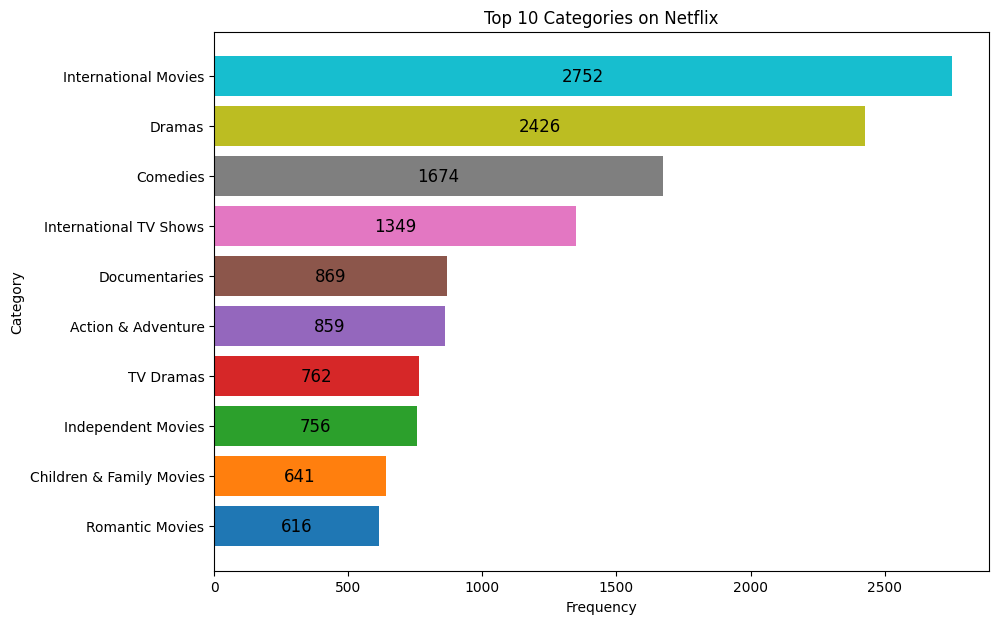

In [ ]:
plt.figure(figsize=(10, 7))
for i in top_10_listed_in:
    fig = plt.barh(i[0], i[1])
    plt.bar_label(fig, label_type='center', size="12", family="DejaVu Sans")

plt.title("Top 10 Categories on Netflix")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()